# Лабораторная работа №0
## Задание
### Применить нейронную сеть Кохонена с самообучение для задачи кластеризации.
### На первом этапе сгенерировать случайные точки на плоскости вокруг 2 центров кластеризации (примерно по 20-30 точек). Далее считать, что сеть имеет два входа (координаты точек) и два выхода – один из них равен 1, другой 0 (по тому, к какому кластеру принадлежит точка). Подавая последовательно на вход (вразнобой) точки, настроить сеть путем применения описанной процедуры обучения так, чтобы она приобрела способность определять, к какому кластеру принадлежит точка.
### Коэффициент 𝛼 выбрать, уменьшая его от шага к шагу по правилу 𝛼 = (50−𝑖)/100, причем для каждого нейрона это будет свое значение 𝛼, а подстраиваться на каждом шаге будут веса только одного (выигравшего) нейрона.

In [144]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=50,
                           n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=72,
                           class_sep=2)

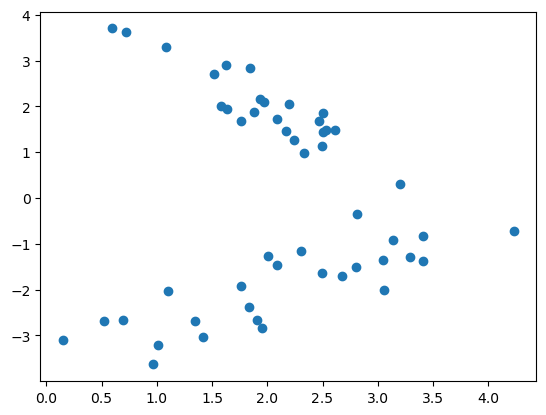

In [145]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

In [146]:
import numpy as np


def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

In [147]:
from scipy.cluster.hierarchy import fcluster, linkage

mergings = linkage(X, method='ward')
T = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, T)
clusters

array([[ 1.92633603,  2.06042638],
       [ 2.1714425 , -1.85705374]])

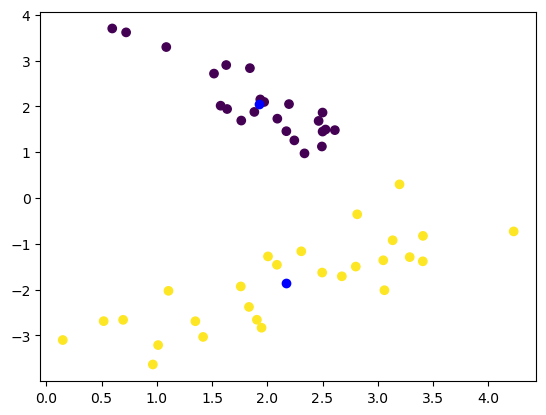

In [148]:
plt.scatter(X[:, 0], X[:, 1], c=T)
plt.scatter(clusters[:, 0], clusters[:, 1], c='blue')

In [149]:
import math


class SOM:
    def __init__(self, n, c):
        """
        n - количестов атрибутов
        C - количество кластеров
        """
        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):
        """
        Вычисление значение шага относительного текущего выбора
        """
        return (50 - i) / 100

    def winner(self, weights, sample):
        """
        Вычисляем выигравший нейрон (вектор) по Евклидову расстоянию
        """
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):
        """
        Обновляем значение для выигравшего нейрона
        """
        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + self.calculate_a(self.a[j]) * (sample[i] - weights[j][i])

        print(f'\nШаг для {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса после обновления:')
        print(weights)

        return weights

In [150]:
# Обучающая выборка (m, n)
# m - объем выборки
# n - количество атрибутов в записи
np.random.shuffle(X)
T = X
m, n = len(T), len(T[0])

# Обучающие веса (n, C)
# n - количество атрибутов в записи
# C - количество кластеров
C = 2

weights = np.random.normal(100, 10, size=(n, C)) / 100
weights

array([[0.85399353, 0.95577859],
       [1.08445702, 1.05798711]])

In [151]:
som = SOM(n, C)
som

In [152]:
for i in range(m):
    sample = T[i]
    J = som.winner(weights, sample)
    weights = som.update(weights, sample, J)


Шаг для 0 кластера = 0.5
Веса после обновления:
[[ 1.76448031 -0.3765888 ]
 [ 1.08445702  1.05798711]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[2.044957   0.28488185]
 [1.08445702 1.05798711]]

Шаг для 1 кластера = 0.5
Веса после обновления:
[[ 2.044957    0.28488185]
 [ 1.45944826 -0.65971239]]

Шаг для 1 кластера = 0.49
Веса после обновления:
[[2.044957   0.28488185]
 [1.5422185  1.08524085]]

Шаг для 0 кластера = 0.48
Веса после обновления:
[[2.27654992 0.865228  ]
 [1.5422185  1.08524085]]

Шаг для 0 кластера = 0.47
Веса после обновления:
[[1.71692975 2.00674409]
 [1.5422185  1.08524085]]

Шаг для 0 кластера = 0.46
Веса после обновления:
[[1.43585278 0.1516366 ]
 [1.5422185  1.08524085]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[ 1.43585278  0.1516366 ]
 [ 1.44957375 -0.72637022]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[1.43585278 0.1516366 ]
 [1.99575517 0.3110251 ]]

Шаг для 0 кластера = 0.45
Веса после обновления:
[[1.73068372 0.86225708]
 [1.99

In [153]:
s = X[0]
J = som.winner(weights, s)

print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: ")
print(weights)

Элемент принадлежит к 1 кластеру, на самом деле к 1 кластеру
Обученные веса: 
[[ 2.0412027  -1.00863229]
 [ 1.66805454 -1.62431671]]


In [154]:
predicted = np.array([som.winner(weights, s) for s in X])
predicted

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0])

In [155]:
y == predicted

array([ True, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False])

In [156]:
from sklearn.metrics import accuracy_score

print(f'Точность кластеризации: {accuracy_score(y, predicted) * 100}%')

Точность кластеризации: 62.0%
